# Neurotech Recruitments 25-26 Tech Track Task-1
## Ananya Mukherjee (2025A7PS0023P)

<H1>PART 1</H1>

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

a = 0.02
b = 0.2
c = -65
d = 2
dt = 0.001

In [86]:
times = np.arange(0,5000,0.001)
v = np.zeros_like(times)
u = np.zeros_like(times)
v[0] = -65
#u[0] will be defined later since it is based on b

with open('Iext.csv','r') as f:
    rdr = csv.reader(f)
    I = np.array([float(row[0]) for row in rdr])

In [87]:
def membranePotential(a,b,c,d):
    global v,u
    u[0] = b*v[0]
    for i in range(len(v)-1):
        v[i+1] = v[i] + dt*(0.04*(v[i]**2) + 5*v[i] + 140 - u[i] + I[i])
        u[i+1] = u[i] + dt*(a*(b*v[i] - u[i]))
    
        if v[i+1] >= 30:
            v[i+1] = c
            u[i+1] = u[i+1] + d

In [119]:
fast = ('fast',0.1,0.3,-55,2)
bursting = ('Bursting',0.02,0.2,-50,4)
#regular = ('Regular',0.02,0.2,-65,2)
regular = ('Regular',0.02,0.2,-65,4)

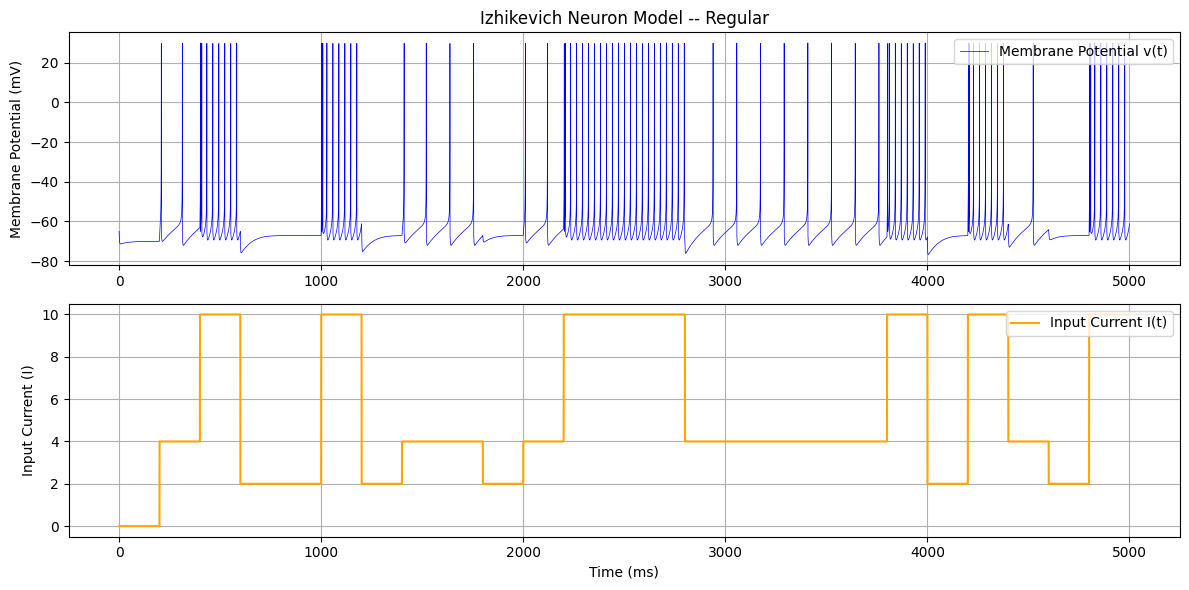

In [120]:
#for setting in [regular,fast,bursting]:
for setting in [regular]:
    name,a,b,c,d = setting
    membranePotential(a,b,c,d)
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(times, v, label='Membrane Potential v(t)', color='blue',linewidth=0.5)
    plt.title('Izhikevich Neuron Model -- '+name)
    plt.ylabel('Membrane Potential (mV)')
    plt.grid()
    plt.legend(loc = 1)
    plt.subplot(2, 1, 2)
    plt.plot(times, I, label='Input Current I(t)', color='orange')
    plt.xlabel('Time (ms)')
    plt.ylabel('Input Current (I)')
    plt.grid()
    plt.legend(loc = 1)
    plt.tight_layout()
    plt.show()

<H1>PART 2</H1>

In [157]:
tauR = 0.5
tauD = 8
V0 = -20
Vsyn = -80
W = 1

In [158]:
r = np.zeros_like(times)
Ii = np.zeros_like(times)
r[0] = 0
Ii[0] = 0

In [161]:
for t in range(len(r)-1):
    r[t+1] = r[t]+ dt*((1/tauR - 1/tauD)*((1-r[t])/(1 + math.e**(V0-v[t]))) - (r[t]/tauD))
    Ii[t+1] = W*r[t+1]*(v[t+1]-Vsyn)
    if Ii[t+1] < 0:
        Ii[t+1] = 0

In [162]:
vi = np.zeros_like(times)
ui = np.zeros_like(times)
vi[0] = -65
ui[0] = vi[0]*b

In [163]:
def neuronImembranePotential(a,b,c,d):
    global vi,ui
    for i in range(len(vi)-1):
        vi[i+1] = vi[i] + dt*(0.04*(vi[i]**2) + 5*vi[i] + 140 - ui[i] + Ii[i])
        ui[i+1] = ui[i] + dt*(a*(b*vi[i] - ui[i]))
    
        if vi[i+1] >= 30:
            vi[i+1] = c
            ui[i+1] = ui[i+1] + d

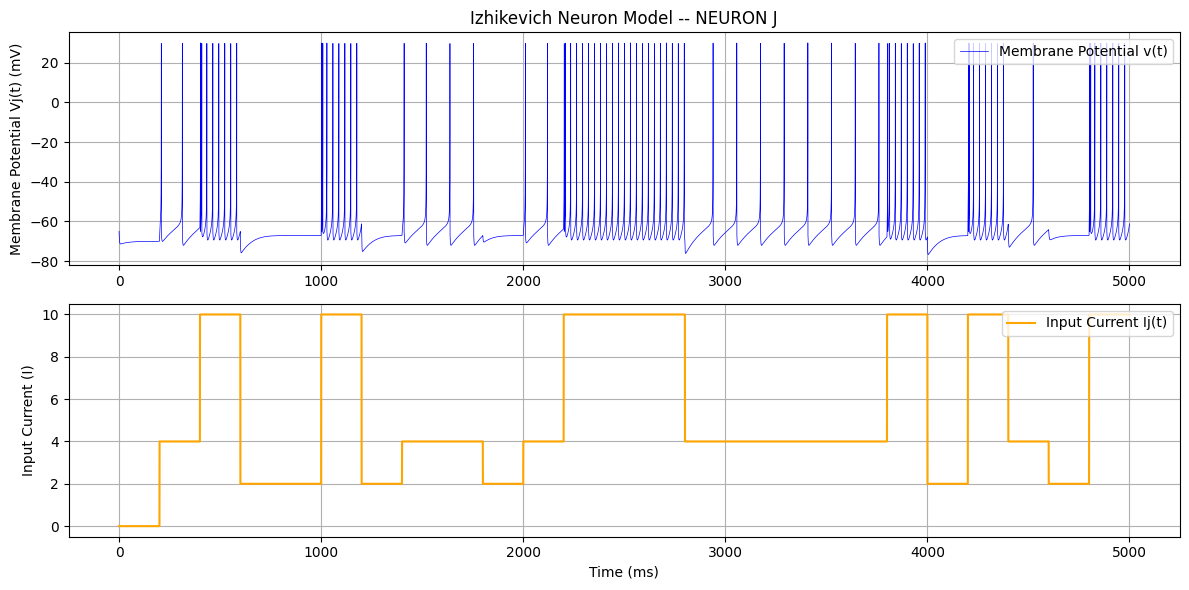

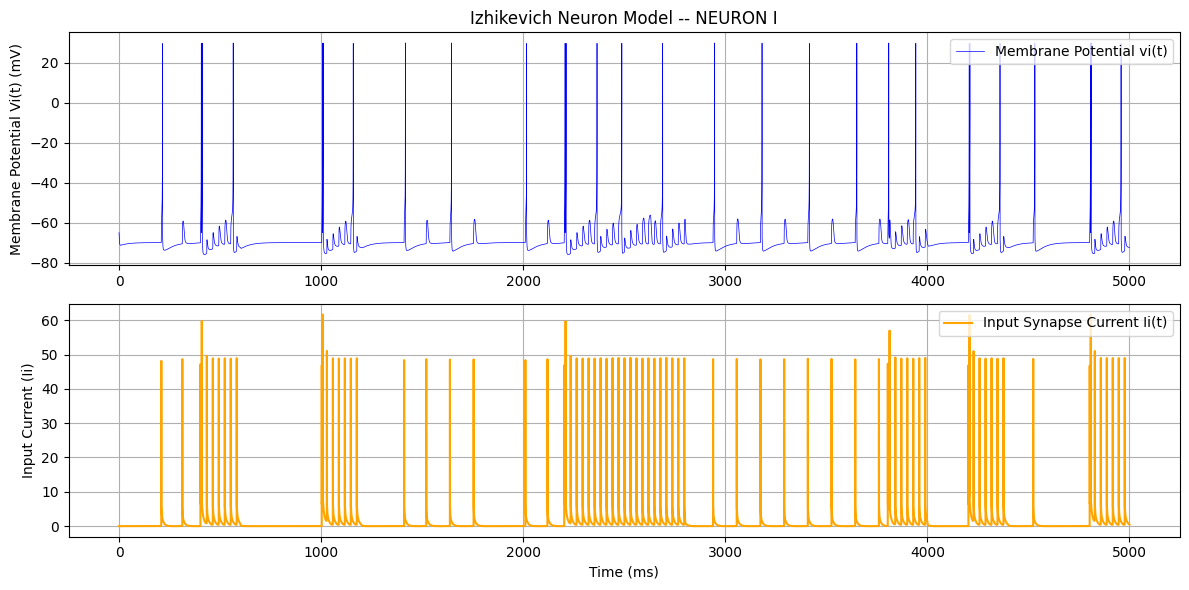

In [164]:
name,a,b,c,d = regular
membranePotential(a,b,c,d)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(times, v, label='Membrane Potential v(t)', color='blue',linewidth=0.5)
plt.title('Izhikevich Neuron Model -- NEURON J')
plt.ylabel('Membrane Potential Vj(t) (mV)')
plt.grid()
plt.legend(loc = 1)
plt.subplot(2, 1, 2)
plt.plot(times, I, label='Input Current Ij(t)', color='orange')
plt.xlabel('Time (ms)')
plt.ylabel('Input Current (I)')
plt.grid()
plt.legend(loc = 1)
plt.tight_layout()
plt.show()

neuronImembranePotential(a,b,c,d)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(times, vi, label='Membrane Potential vi(t)', color='blue',linewidth=0.5)
plt.title('Izhikevich Neuron Model -- NEURON I')
plt.ylabel('Membrane Potential Vi(t) (mV)')
plt.grid()
plt.legend(loc = 1)
plt.subplot(2, 1, 2)
plt.plot(times, Ii, label='Input Synapse Current Ii(t)', color='orange')
plt.xlabel('Time (ms)')
plt.ylabel('Input Current (Ii)')
plt.grid()
plt.legend(loc = 1)
plt.tight_layout()
plt.show()

# BROWNIE POINTS (PART A)

1. Variable a controls how quickly the recovery variable changes (or reacts) to the changes in the membrane potential. So, it reduces the length of time that the neuron spikes, and brings in back down faster.
2. Variable b makes the recovery variable rate more strongly dependent on v, so the membrane potential rapidly increases after dropping.
3. Variable c is the reset membrane potential after reaching its maximum of 30mV during a spike.
4. Variable d is added to the recovery variable after each spike, and slows down the neuron's firing rate even further

# BROWNIE POINTS (PART B)

### Quantity  'r'

According to the formula,

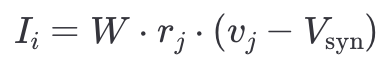

'r' should represent a portion of the synaptic conductance, which has been influenced by pre-synaptic (Neuron J) membrane potential, as can be observed from the formula of its differential,

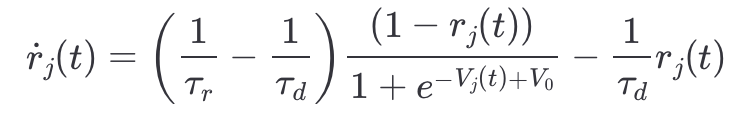

Since it alters the synaptic conductance, it affects the current which passes therough Neuron I [Ii(t)]





### Comparison of change in synaptic weight (W)

Increase in synaptic weight results in an increase in the input current of neuron I, and is thus a measure of the conductance through the synapse.


#### W = 1
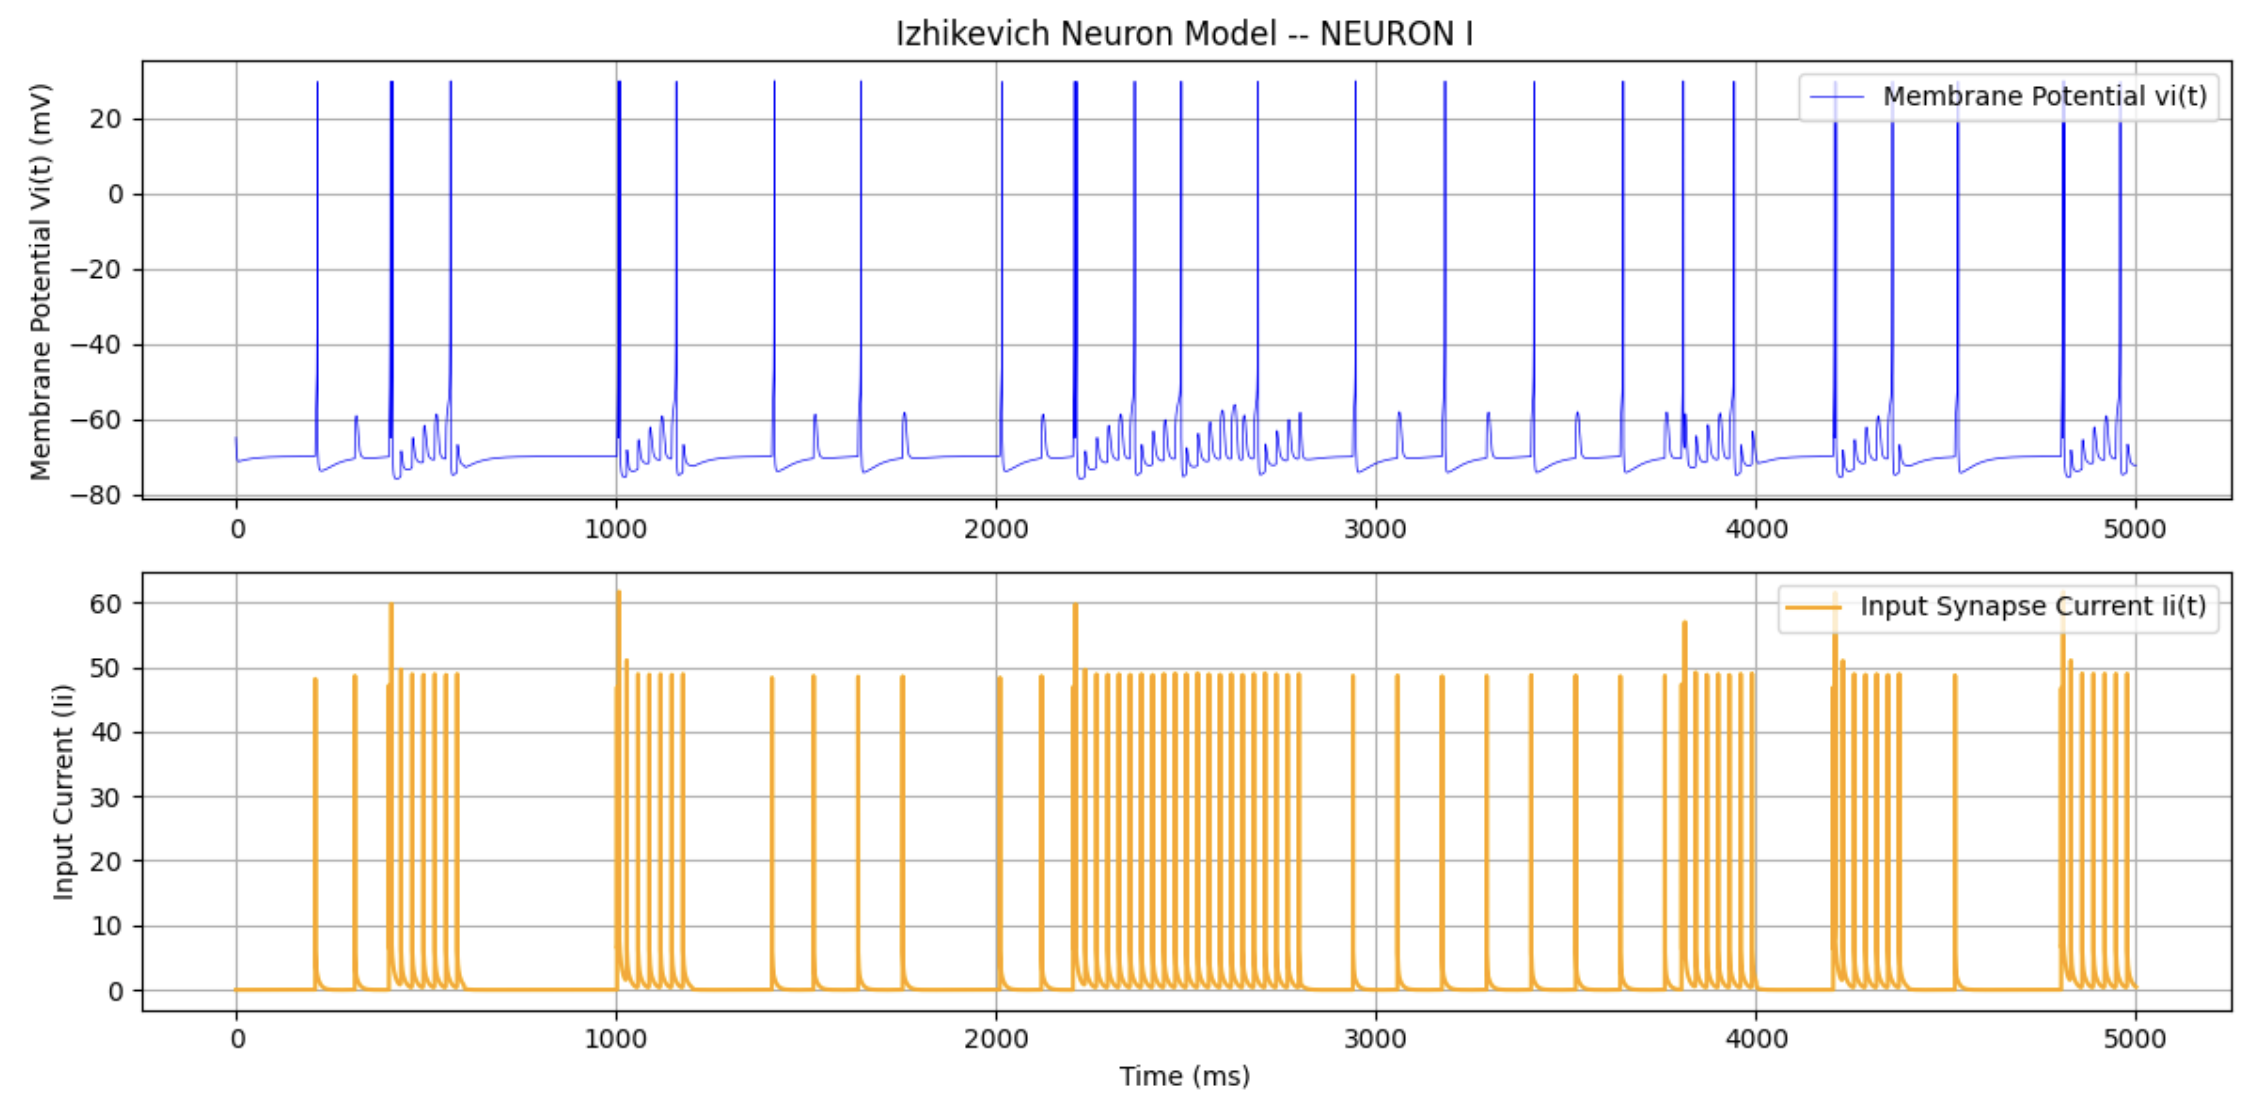
#### W = 1.5
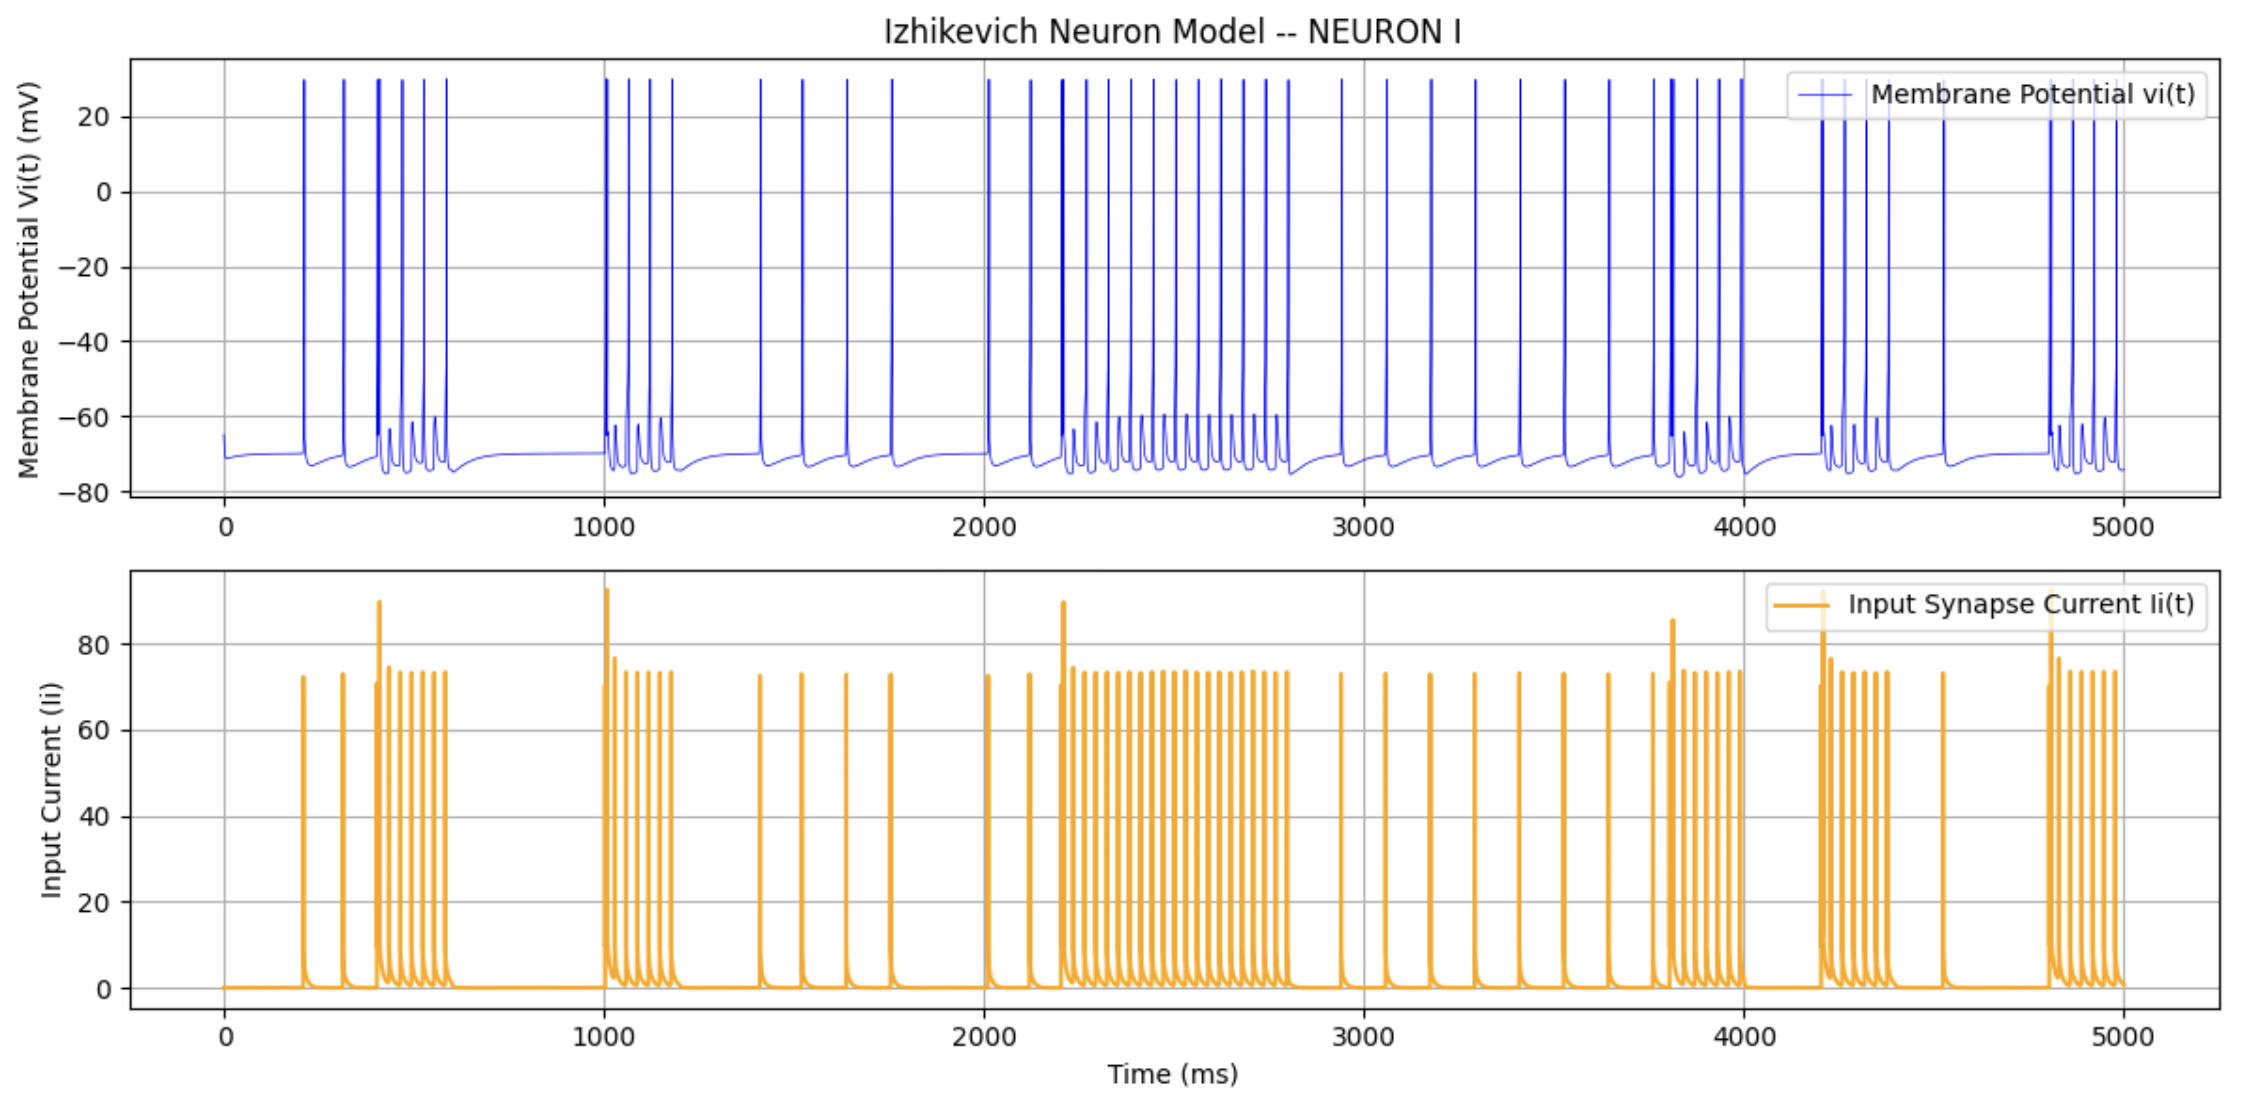

References used:

1. Differential equations - Euler’s Method. (n.d.). https://tutorial.math.lamar.edu/classes/de/eulersmethod.aspx
2. A Novel CPU/GPU Simulation Environment for Large-Scale Biologically-Realistic Neural Modeling - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/IZH-neuron-model-specific-values-used-for-parameters-a-b-c-and-d_fig3_257535603 [accessed 9 Sept 2025]
3. Andabili, M.N., Nazari, S. & Moosazadeh, T. Chaotic dynamics analysis and digital hardware design of the Izhikevich neuron model. Sci Rep 15, 16766 (2025). https://doi.org/10.1038/s41598-025-01876-5